In [6]:
import numpy as np
import math
from scipy.stats import gamma, uniform, loggamma
import matplotlib.pyplot as plt
import pandas as pd

In [101]:
file = 'data.xlsx'
data = pd.read_excel(file).replace(',','.', regex=True)
data_np = np.array(data).astype(float)

In [105]:
def ln_gamma(theta, lamda, nu):
    dens_ln_gamma = (lamda-1)*np.log(theta) - theta*nu
    return dens_ln_gamma

In [112]:
def mcmc(y, iterar, sigma, lamda_alpha, lamda_beta, nu_alpha, nu_beta):
    
    # 1. Número de observaciones
    n = len(y)
    
    # 2. Suma de observaciones y suma del ln de las observaciones
    suma_y = sum(y)
    suma_ln_y = sum(np.log(y))
    
    # 3. Tabla de muestras: alpha - beta
    param = np.zeros((iterar, 2))
    
    # 4. Valores iniciales
    alpha_cur = 1
    beta_cur = 1
    param[0,0] = alpha_cur
    param[0,1] = beta_cur
    
    # 5. MCMC
    for i in range(iterar):
        
        # 6. Actualizar alpha: método MH
        
        # Nuevo valor propuesto de alfa: caminata gaussiana
        alpha_can = np.random.normal(alpha_cur, sigma)
        
        if alpha_can > 0:
            
            # ln de la verosimilitud
            ln_lik_alpha_cur = n*alpha_cur*np.log(beta_cur) - n*loggamma.rvs(alpha_cur) + (alpha_cur-1)*suma_ln_y
            ln_lik_alpha_can = n*alpha_cur*np.log(beta_cur) - n*loggamma.rvs(alpha_cur) + (alpha_cur-1)*suma_ln_y
            
            # ln de las distribuciones previas (priors)
            ln_prior_alpha_cur = ln_gamma(alpha_cur, lamda_alpha, nu_alpha)
            ln_prior_alpha_can = ln_gamma(alpha_can, lamda_alpha, nu_alpha)
            
            #ln de la distribución posterior
            ln_pi_cur = ln_lik_alpha_cur + ln_prior_alpha_cur
            ln_pi_can = ln_lik_alpha_can + ln_prior_alpha_can
            
            # M-H ratio
            # draw from a U(0,1)
            u = np.random.uniform(1)
            
            if np.log(u) < ln_pi_can - ln_pi_cur:
                alpha_cur = alpha_can        
        
        # 7. Actualiza beta: método Gibbs (probabilidad condicional)    
        beta_cur = gamma.rvs(alpha_cur*n + lamda_beta, scale = 1/(suma_y + nu_beta))
    
        # 8. Guarda las muestras
        param[i,0] = alpha_cur
        param[i,1] = beta_cur
    
    return param

AttributeError: 'Line2D' object has no property 'type'

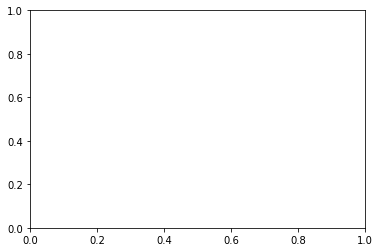

In [114]:
parametros_sim = mcmc(y = data_np, iterar = 10000, sigma = 1, lamda_alpha = 1, lamda_beta = 1, nu_alpha = 0.001, nu_beta = 0.001)

# trace plots to ensure that the chains mix well
plt.plot(parametros_sim[:,0], type='l', title = 'alpha')
plt.plot(parametros_sim[:,1], type='l', title = 'beta')

In [ ]:
#draw histograms
parametros_sim[:,0].hist(bins=100, figsize=(15,7), density= False)
parametros_sim[:,1].hist(bins=100, figsize=(15,7), density= False)